<a href="https://colab.research.google.com/github/Ibitoye-Oyinloye/Feature-Engineering/blob/main/Titanic_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explore The Data: Explore Continuous Features


This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people
would survive based on the following fields:

### Data Dictionary

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Qu
Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**                                            


## Import all the neccessary Libraries

In [1]:
# Read in our data
import pandas as pd
import io
import os
import sys
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
titanic = pd.read_csv('/content/gdrive/MyDrive/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic.sample(n=7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.00,0,0,345778,9.5000,NaN,S
209,210,1,1,"Blank, Mr. Henry",male,40.00,0,0,112277,31.0000,A31,C
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.00,0,0,236852,13.0000,NaN,S
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.00,0,0,250648,13.0000,NaN,S
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.00,1,1,350404,7.8542,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C


#Understand the shape of the dataset

In [7]:
titanic.shape

(891, 12)

**The data is 891 rows by 12 column**

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- There are 12 columns named: 'Passenger ID','Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked' whose data type are int64, int64, int64, object, object, float64, int64, int64, object, float64,object, object respectively.
Name, Sex, Ticket, Cabin, and Embarked are object, we can change them to categories.-

## Covert Objects to Categories

In [9]:

titanic['Name'] = titanic['Name'].astype('category')
titanic['Sex'] = titanic['Sex'].astype('category')
titanic['Ticket'] = titanic['Ticket'].astype('category')
titanic['Cabin'] = titanic['Cabin'].astype('category')
titanic['Embarked'] = titanic['Embarked'].astype('category')

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


## Missing Value Check and Duplicate

In [11]:
titanic.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are no missing value




In [12]:
titanic.duplicated().sum()

0

- There are no Duplicates in the variables

In [13]:
titanic1 = titanic.copy()

In [14]:
titanic.shape

(891, 12)

## Statistical Analysis

In [15]:
# let's view the statistical summary of the non-numerical columns in the data
titanic.describe(exclude=np.number).T.style.highlight_max(color="yellow", axis=0)

,count,unique,top,freq
Name,891,891,"Abbing, Mr. Anthony",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,C23 C25 C27,4
Embarked,889,3,S,644


In [16]:
# let's view the statistical summary of the numerical columns in the data
titanic.describe(include=np.number).T.style.highlight_max(color="yellow", axis=0)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [17]:
titanic[titanic["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [18]:
titanic[titanic["Fare"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,15.0,516.400000,225.808958,180.0,290.5,482.0,704.0,823.0
Survived,15.0,0.066667,0.258199,0.0,0.0,0.0,0.0,1.0
Pclass,15.0,1.933333,0.798809,1.0,1.0,2.0,2.5,3.0
Age,7.0,35.142857,10.023781,19.0,30.5,38.0,39.5,49.0
SibSp,15.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Parch,15.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Fare,15.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [19]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Drop Categorical Variables

In [20]:
# Drop all categorical features
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic1.drop(cat_feat, axis=1, inplace=True)
titanic1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# Look at the correlation matrix
titanic1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [23]:
# Look at fare by different passenger class levels
titanic1.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [24]:
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(titanic1.groupby('Survived')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    survived = titanic1[titanic1['Survived']==1][feature]
    not_survived = titanic1[titanic1['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [25]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    describe_cont_feature(feature)


*** Results for Pclass ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-statistic: -10.3, p-value: 2.91e-23
None

*** Results for Age ***
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-statistic: nan, p-value: nan
None

*** Results for SibSp ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-statistic: -1.2, p-value: 0.233
None

*** Results for Parch ***
          count

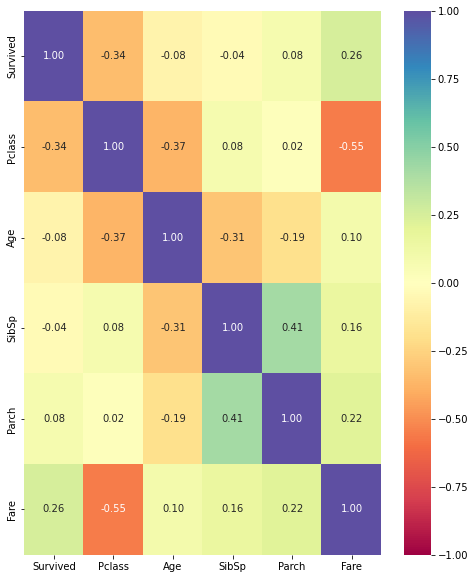

In [26]:
plt.figure(figsize=(8, 10))
sns.heatmap(titanic1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Exploratory Data Analysis

### Univariate Analysis

In [27]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=titanic1, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=titanic1, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=titanic1, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

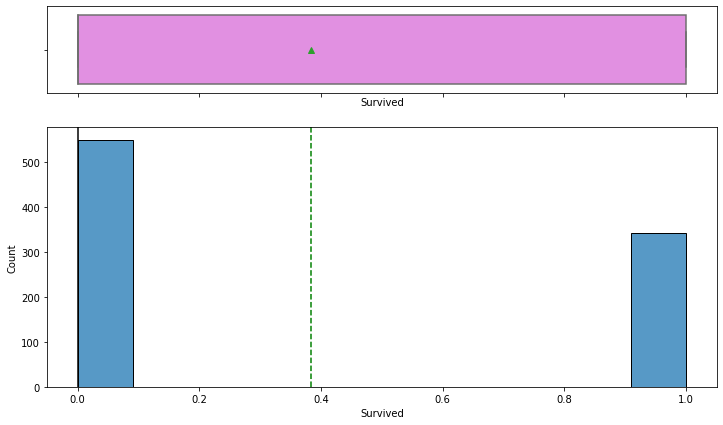

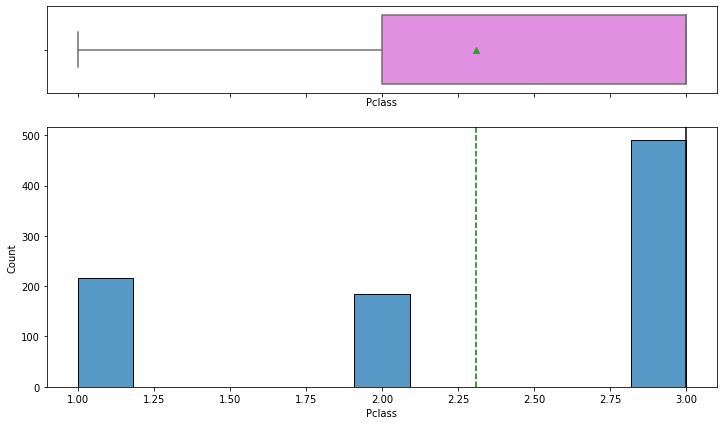

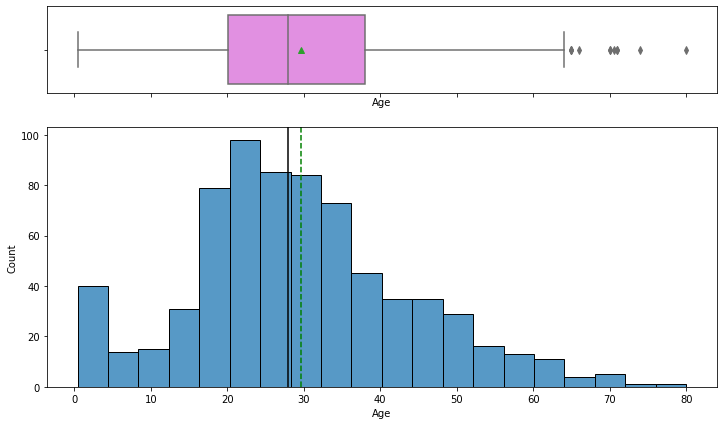

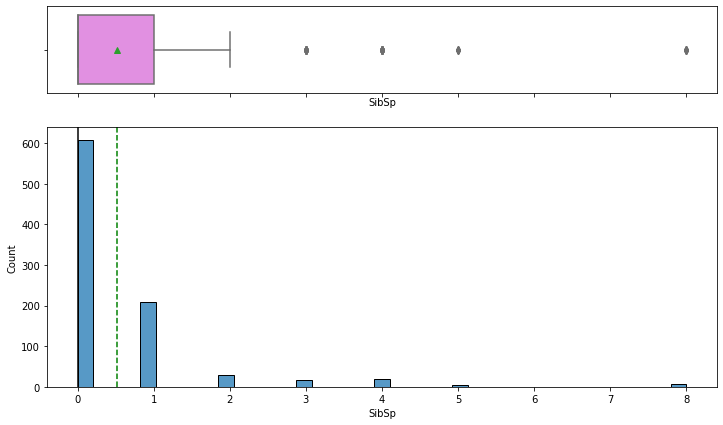

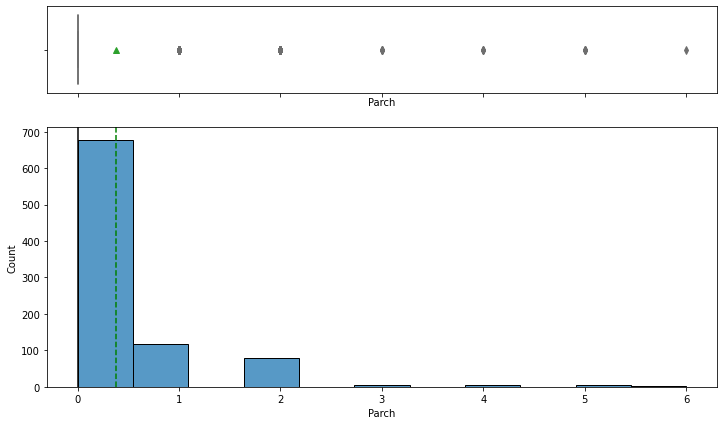

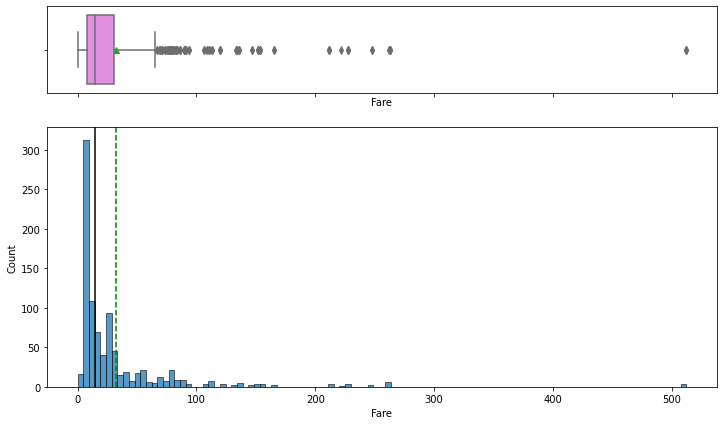

In [28]:
for feature in titanic1.columns:
    histogram_boxplot(titanic1, feature, figsize=(12, 7), kde=False, bins=None)

In [29]:
# function to create labeled barplots


def labeled_barplot(titanic1, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(titanic1[feature])  # length of the column
    count = titanic1[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=titanic1,
        x=feature,
        palette="Paired",
        order=titanic1[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot# Frequency tables for each categorical feature


### Observation on Survived

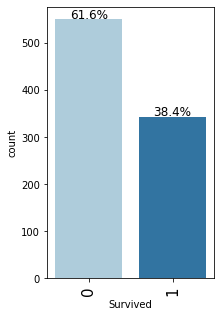

In [30]:
labeled_barplot(titanic1, "Survived", perc=True)

In [31]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


### Observation on Pclass

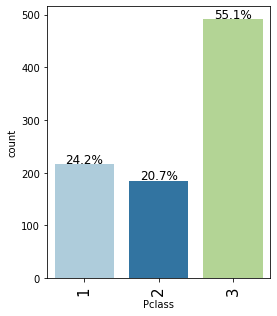

In [32]:
labeled_barplot(titanic1, "Pclass", perc=True)

### Observation on Age

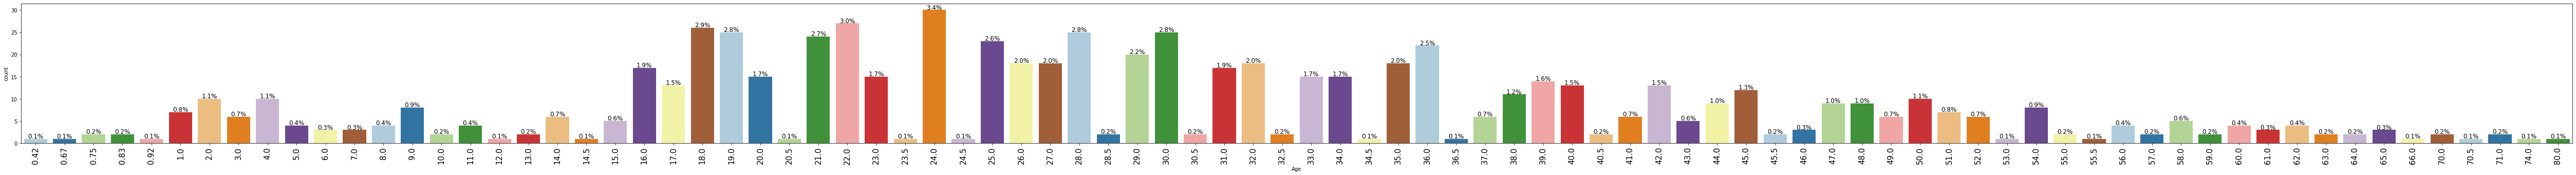

In [33]:
labeled_barplot(titanic1, "Age", perc=True)

### Bivarate Analysis

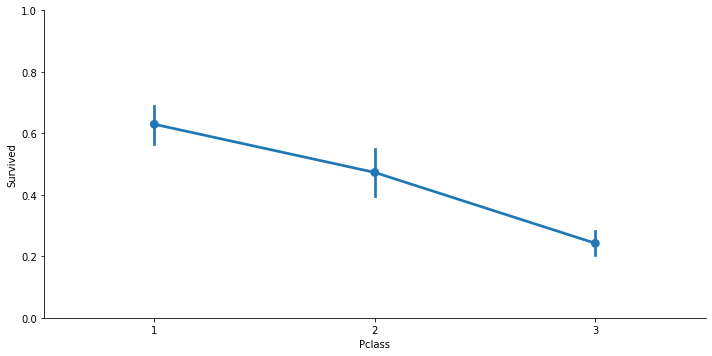

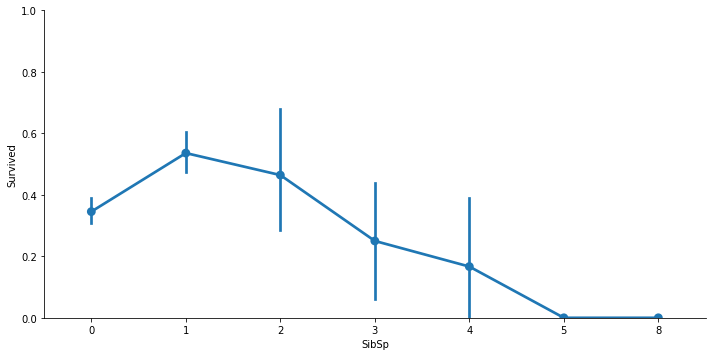

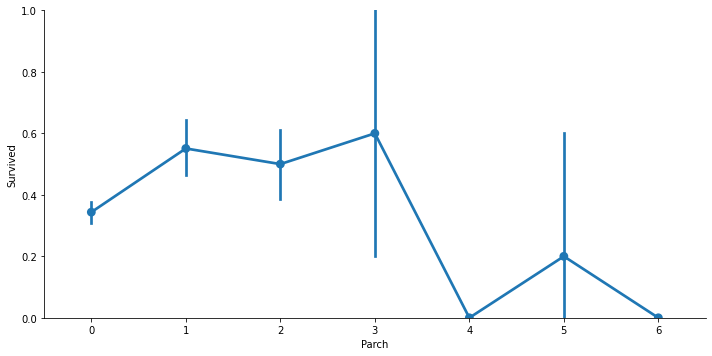

In [34]:
# Generate categorical plots for ordinal features
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic1, kind='point', aspect=2, )
    plt.ylim(0, 1)

(0.0, 1.0)

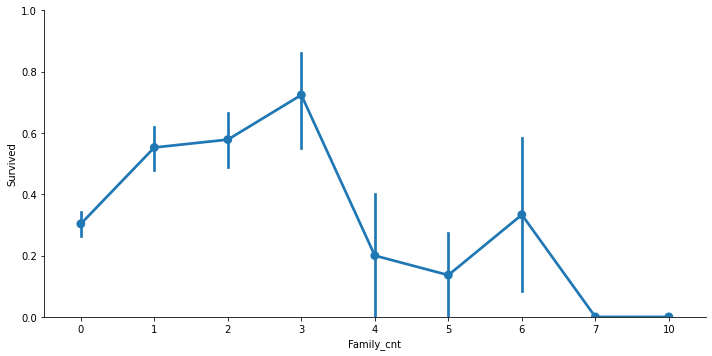

In [35]:
# Create a new family count feature
titanic1['Family_cnt'] = titanic1['SibSp'] + titanic1['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=titanic1, kind='point', aspect=2, )
plt.ylim(0, 1)

In [36]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Family_cnt  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


In [38]:
titanic2 = titanic.copy()

In [39]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


## Handling Missing Values

In [40]:
# Check if there are any missing values
titanic2.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
titanic2.loc[(titanic2['Age'].isnull()) |
              (titanic2['Cabin'].isnull()) |
              (titanic2['Embarked'].isnull()) |
              (titanic2['Embarked'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [42]:
titanic2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
# let's view the statistical summary of the non-numerical columns in the data
titanic2.describe(exclude=np.number).T.style.highlight_max(color="yellow", axis=0)

,count,unique,top,freq
Name,891,891,"Abbing, Mr. Anthony",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,C23 C25 C27,4
Embarked,889,3,S,644


In [44]:
# let's view the statistical summary of the numerical columns in the data
titanic2.describe(include=np.number).T.style.highlight_max(color="yellow", axis=0)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [45]:
# Explore the number of unique values for each feature
for col in titanic2.columns:
    print('{}: {} unique values'.format(col, titanic2[col].nunique()))

PassengerId: 891 unique values
Survived: 2 unique values
Pclass: 3 unique values
Name: 891 unique values
Sex: 2 unique values
Age: 88 unique values
SibSp: 7 unique values
Parch: 7 unique values
Ticket: 681 unique values
Fare: 248 unique values
Cabin: 147 unique values
Embarked: 3 unique values


### Grouped by Sex

In [46]:
# Check survival rate by gender
titanic2.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [47]:
titanic2.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [48]:
titanic2.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [49]:
# Is Cabin missing at random?
titanic2.groupby(titanic['Cabin'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
False,455.401961,0.666667,1.196078,35.829297,0.441176,0.436275,76.141504
True,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325


In [50]:
# Is Cabin missing at random?
titanic2.groupby(titanic2['Cabin'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
False,455.401961,0.666667,1.196078,35.829297,0.441176,0.436275,76.141504
True,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325


In [51]:
titanic2.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [52]:
titanic2['Cabin_ind'] = np.where(titanic2['Cabin'].isnull(), 0, 1)
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [53]:
# Look at unique values for the Ticket feature
titanic2['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
345572      1
345364      1
343276      1
343275      1
347464      1
Name: Ticket, Length: 681, dtype: int64

In [54]:
titanic2.sample(n=7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S,0
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S,1
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,1
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S,0
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,0


### Splitting Categorical Variable

In [55]:
# Create a title feature by parsing passenger name
titanic2['Title'] = titanic2['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [56]:
# Look at survival rate by title
titanic2.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         female        0       NaN
             male          1  0.000000
Col          female        0       NaN
             male          2  0.500000
Don          female        0       NaN
             male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     female        0       NaN
             male          1  0.000000
Lady         female        1  1.000000
             male          0       NaN
Major        female        0       NaN
             male          2  0.500000
Master       female        0       NaN
             male         40  0.575000
Miss         female      182  0.697802
             male          0       NaN
Mlle         female        2  1.000000
             male          0       NaN
Mme          female        1  1.000000
             male          0       NaN
Mr           female        0       NaN
             male        517  0.156673
Mrs          female      125  0.792000
             male          0       NaN
Ms           female        1  1.000000
             male          0       NaN
Rev          female        0       NaN
             male          6  0.000000
Sir          female        0       NaN
             male          1  1.000000
the Countess female        1  1.000000
             male          0       NaN

In [57]:
titanic2['Title1'] = titanic2['Title'].apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Other')
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind,Title,Title1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,Mr


In [58]:
# Look at survival rate by title
titanic2.pivot_table('Survived', index=['Title1', 'Sex'], aggfunc=['count', 'mean'])

count      mean
              Survived  Survived
Title1 Sex                      
Master female        0       NaN
       male         40  0.575000
Miss   female      182  0.697802
       male          0       NaN
Mr     female        0       NaN
       male        517  0.156673
Mrs    female      125  0.792000
       male          0       NaN
Other  female        7  1.000000
       male         20  0.250000

### Converting Sex to Numeric

In [59]:
gender_num = {'male': 0, 'female': 1}
titanic2['Sex'] = titanic2['Sex'].map(gender_num)
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind,Title,Title1
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,Mr,Mr


In [60]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
titanicP = titanic.copy()

In [62]:
titanicP.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind,Title,Title1
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,Mr,Mr


### Treatment of Missing Value

In [64]:
# Check where we have missing values
titanic2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_ind        0
Title            0
Title1           0
dtype: int64

In [65]:
titanic2.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_ind
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [66]:
median_data = titanic2['Age'].median()
median_data

28.0

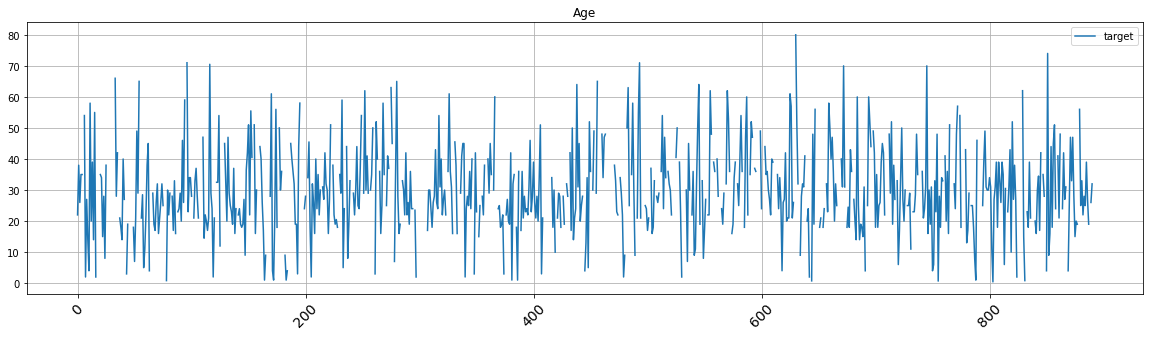

In [67]:
# Let's visualize vehicles data
# How does missing data show up?
plt.figure(figsize=(20,5))
plt.title('Age')
plt.plot(titanic2['Age'], label='target')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

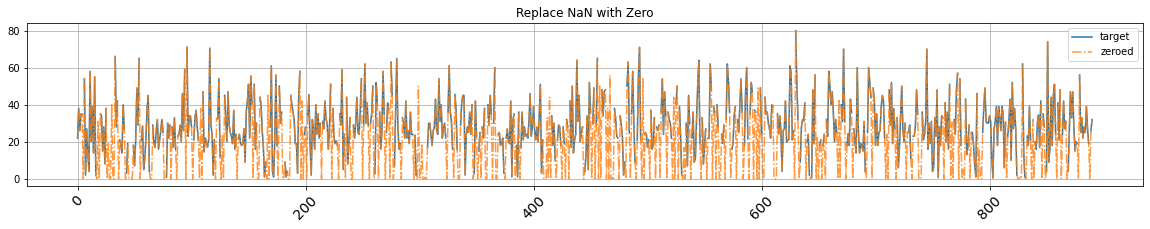

In [68]:
# Replace missing values with zero

plt.figure(figsize=(20,3))
plt.title('Replace NaN with Zero')
plt.plot(titanic2['Age'], label='target')

# fillna to replace NaNs with provided value
Age= titanic2['Age'].fillna(0)

plt.plot(Age,ls='-.',alpha=0.8,label='zeroed')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

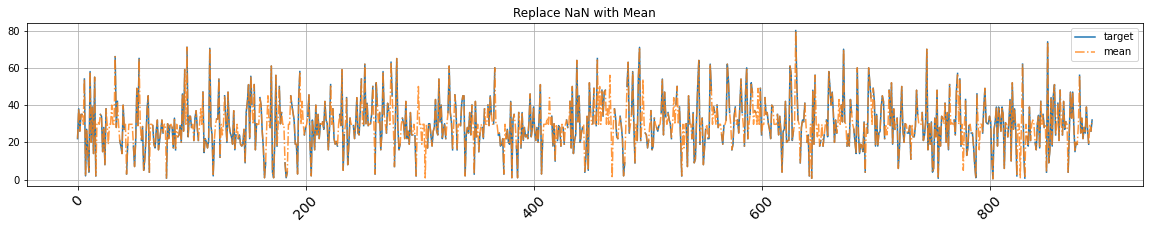

In [69]:
# Replace missing values with mean value for that attribute
plt.figure(figsize=(20,3))
plt.title('Replace NaN with Mean')
plt.plot(titanic2['Age'], label='target')

# fillna to replace NaNs with provided value
Age = titanic2['Age'].fillna(titanic2['Age'].mean())

plt.plot(Age,ls='-.',alpha=0.8,label='mean')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

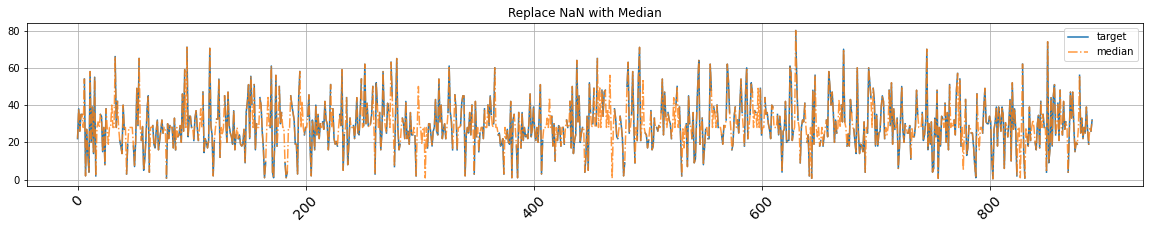

In [70]:
# Replace missing values with mean value for that attribute
plt.figure(figsize=(20,3))
plt.title('Replace NaN with Median')
plt.plot(titanic2['Age'], label='target')

# fillna to replace NaNs with provided value
Age= titanic2['Age'].fillna(titanic2['Age'].median())

plt.plot(Age,ls='-.',alpha=0.8,label='median')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

In [71]:
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind,Title,Title1
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,Mr,Mr


In [72]:
# Fill in missing values for the Age feature
titanic2['Age_clean'] = titanic2['Age'].fillna(titanic2['Age'].median())
titanic2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_ind        0
Title            0
Title1           0
Age_clean        0
dtype: int64

In [73]:
titanic2.drop(['Cabin', 'Title','Age', 'Name', 'Ticket','PassengerId'], axis=1, inplace=True)
titanic2.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin_ind,Title1,Age_clean
0,0,3,0,1,0,7.2500,S,0,Mr,22.0
1,1,1,1,1,0,71.2833,C,1,Mrs,38.0
2,1,3,1,0,0,7.9250,S,0,Miss,26.0
3,1,1,1,1,0,53.1000,S,1,Mrs,35.0
4,0,3,0,0,0,8.0500,S,0,Mr,35.0


In [74]:
titanic2.isnull().sum()

Survived     0
Pclass       0
Sex          0
SibSp        0
Parch        0
Fare         0
Embarked     2
Cabin_ind    0
Title1       0
Age_clean    0
dtype: int64

### Missing Value for Embarked

In [75]:
# Fill in missing values for the Embarked feature
titanic2['Embarked_clean'] = titanic2['Embarked'].fillna('C')
titanic2.isnull().sum()

Survived          0
Pclass            0
Sex               0
SibSp             0
Parch             0
Fare              0
Embarked          2
Cabin_ind         0
Title1            0
Age_clean         0
Embarked_clean    0
dtype: int64

In [76]:
# Drop all categorical features
cat_feat = ['Embarked']
titanic2.drop(cat_feat, axis=1, inplace=True)
titanic2.head()


,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin_ind,Title1,Age_clean,Embarked_clean
0,0,3,0,1,0,7.2500,0,Mr,22.0,S
1,1,1,1,1,0,71.2833,1,Mrs,38.0,C
2,1,3,1,0,0,7.9250,0,Miss,26.0,S
3,1,1,1,1,0,53.1000,1,Mrs,35.0,S
4,0,3,0,0,0,8.0500,0,Mr,35.0,S


## Creating And Cleaning Features: Transform Skewed Features

In [77]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=titanic2,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

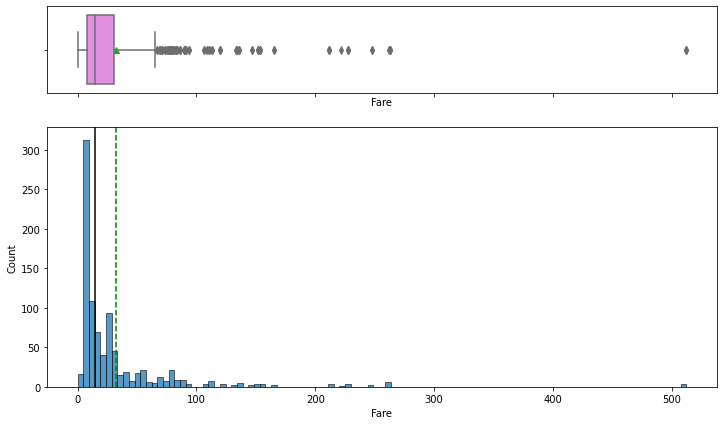

In [78]:
histogram_boxplot(titanic2, "Fare")

In [79]:
titanic2[titanic2["Fare"] > 300]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin_ind,Title1,Age_clean,Embarked_clean
258,1,1,1,0,0,512.3292,0,Miss,35.0,C
679,1,1,0,0,1,512.3292,1,Mr,36.0,C
737,1,1,0,0,0,512.3292,1,Mr,35.0,C


In [80]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=titanic2, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=titanic2, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=titanic2, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

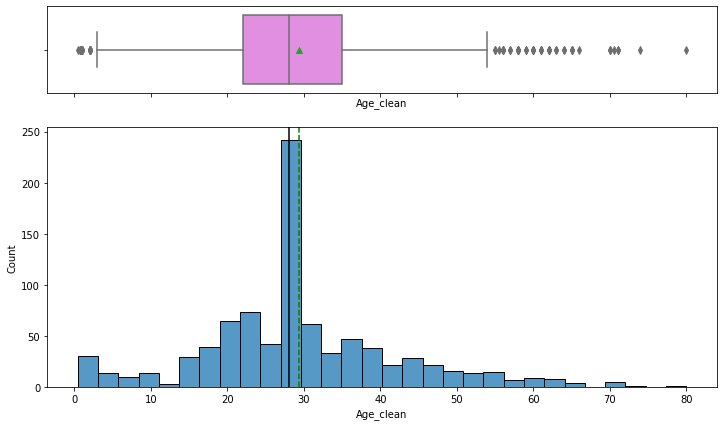

In [81]:
histogram_boxplot(titanic2, "Age_clean")

### Box-Cox Power Transformation

*Base Form* $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |

*Example (Using Fare)*

| Original value    | Transformation           |           Transformation               |
|------|--------------------------|--------------------------|
| $$ 50 $$    | $$ \frac{1}{50^2} $$           |  $$ 0.0004 $$      |
| $$ 50 $$    | $$ \frac{1}{50} $$          | $$ 0.02 $$        |
| $$ 50 $$  | $$ \frac{1}{\sqrt{50}} $$ | $$ 0.14 $$ |
| $$ 50 $$     | $$ log(50) $$              | $$ 1.7 $$             |
| $$ 50 $$   | $$ \sqrt{50} $$ | $$ 7.07 $$           |
| $$ 50 $$     | $$ 50 $$              | $$ 50 $$                  |
| $$ 50 $$     | $$ 50^2 $$           | $$ 2500 $$                |

*Process*

1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

In [82]:
from statsmodels.graphics.gofplots import qqplot

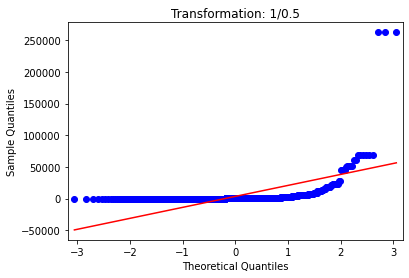

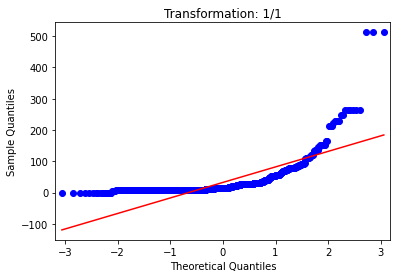

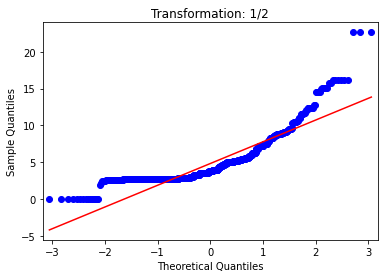

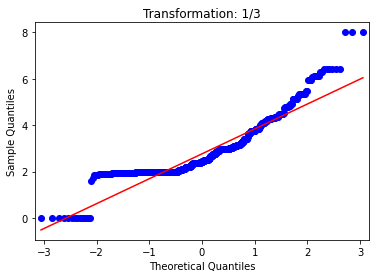

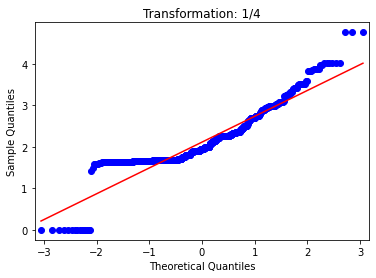

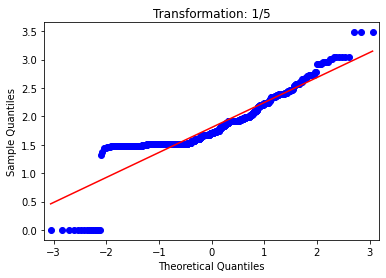

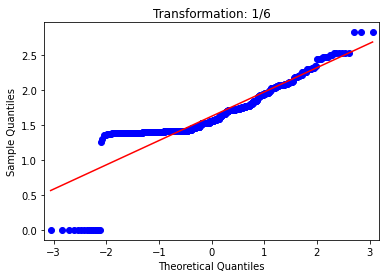

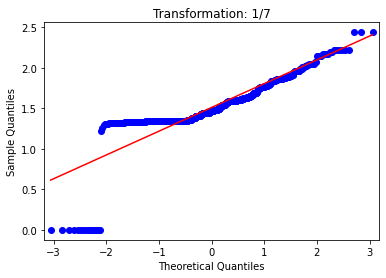

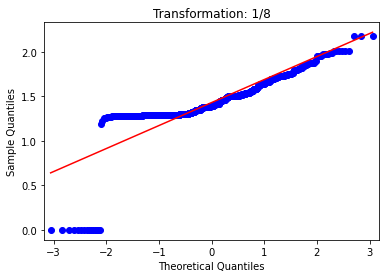

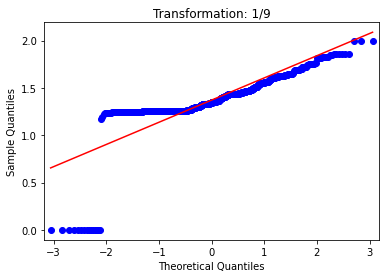

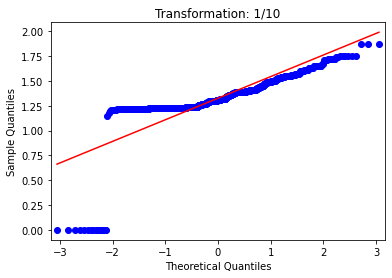

In [83]:
# Generate QQ plots
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = titanic2['Fare']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

In [84]:
import scipy.stats

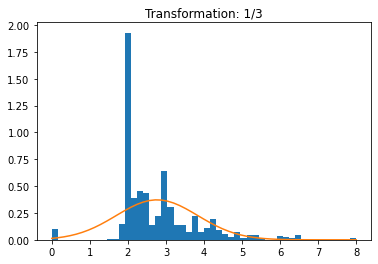

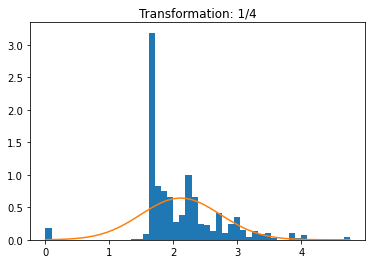

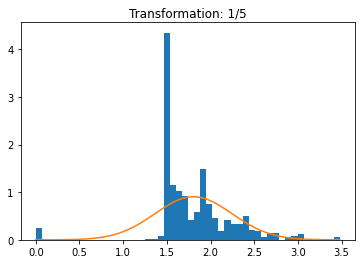

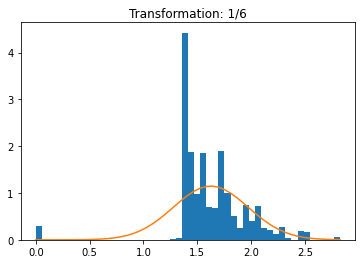

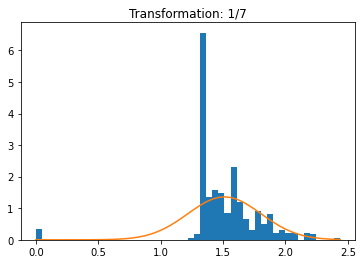

In [85]:
# Box-Cox transformation
for i in [3, 4, 5, 6, 7]:
    data_t = titanic2['Fare']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

In [86]:
# Create the new transformed feature
titanic2['Fare_clean_tr'] = titanic2['Fare'].apply(lambda x: x**(1/5))
titanic2.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin_ind,Title1,Age_clean,Embarked_clean,Fare_clean_tr
0,0,3,0,1,0,7.2500,0,Mr,22.0,S,1.486167
1,1,1,1,1,0,71.2833,1,Mrs,38.0,C,2.347457
2,1,3,1,0,0,7.9250,0,Miss,26.0,S,1.512864
3,1,1,1,1,0,53.1000,1,Mrs,35.0,S,2.213191
4,0,3,0,0,0,8.0500,0,Mr,35.0,S,1.517606


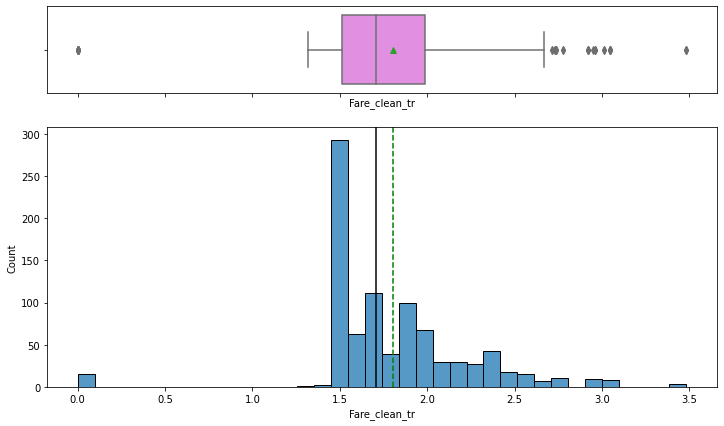

In [87]:
histogram_boxplot(titanic2, 'Fare_clean_tr')

In [88]:
# Drop all categorical features
cat_feat = ['Fare']
titanic2.drop(cat_feat, axis=1, inplace=True)
titanic2.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin_ind,Title1,Age_clean,Embarked_clean,Fare_clean_tr
0,0,3,0,1,0,0,Mr,22.0,S,1.486167
1,1,1,1,1,0,1,Mrs,38.0,C,2.347457
2,1,3,1,0,0,0,Miss,26.0,S,1.512864
3,1,1,1,1,0,1,Mrs,35.0,S,2.213191
4,0,3,0,0,0,0,Mr,35.0,S,1.517606


## Handling Outliers





In [89]:
titanic2.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.000000,0.000000,1.000000,1.00000
Pclass,891.0,2.308642,0.836071,1.00,2.000000,3.000000,3.000000,3.00000
SibSp,891.0,0.523008,1.102743,0.00,0.000000,0.000000,1.000000,8.00000
Parch,891.0,0.381594,0.806057,0.00,0.000000,0.000000,0.000000,6.00000
Cabin_ind,891.0,0.228956,0.420397,0.00,0.000000,0.000000,0.000000,1.00000
Age_clean,891.0,29.361582,13.019697,0.42,22.000000,28.000000,35.000000,80.00000
Fare_clean_tr,891.0,1.804358,0.440473,0.00,1.512306,1.706078,1.987341,3.48265


### How to Identify Outliers
- Using Statiscal Analysis
- Using Pictoral View


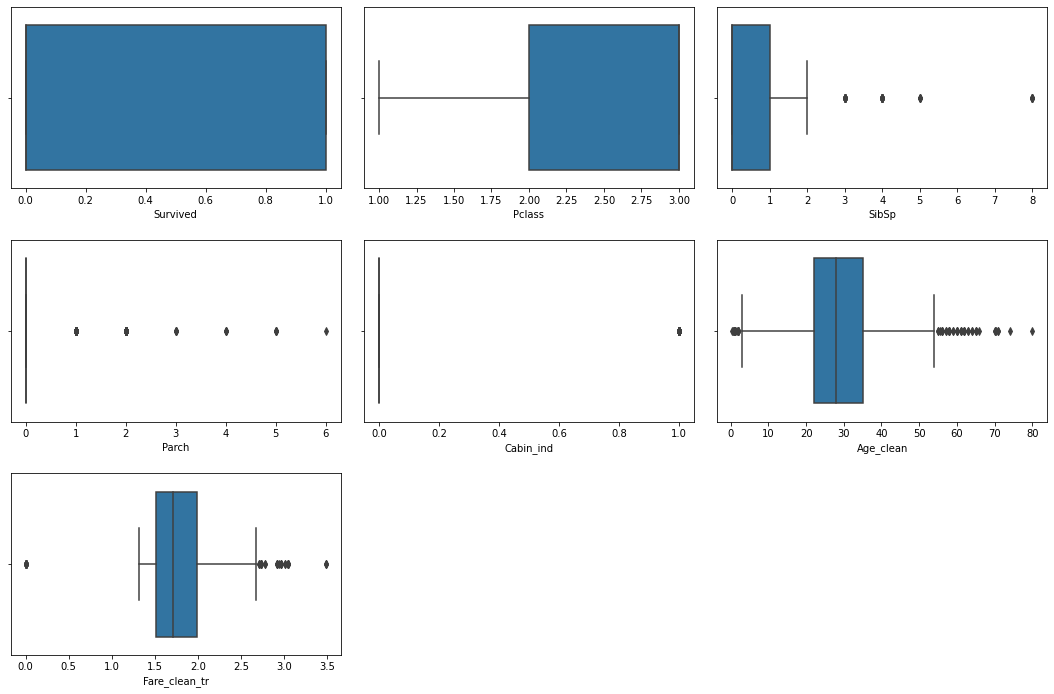

In [90]:
# outlier detection using boxplot
num_cols = titanic2.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 10))
for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=titanic2, x=variable)
    plt.tight_layout(pad=2)
plt.show()

### How to Handle Outliers
-  Delete Outliers
-  By Clipping




In [91]:
#Clipping the two extreme values
titanic2['Fare_clean_tr']=titanic2['Fare_clean_tr'].clip(upper=3)

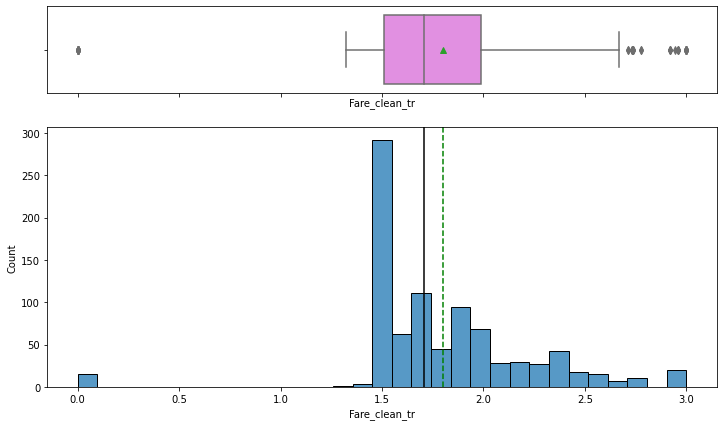

In [92]:
histogram_boxplot(titanic2, 'Fare_clean_tr')

In [93]:
#Clipping the two extreme values
titanic2['Age_clean']=titanic2['Age_clean'].clip(upper=70)

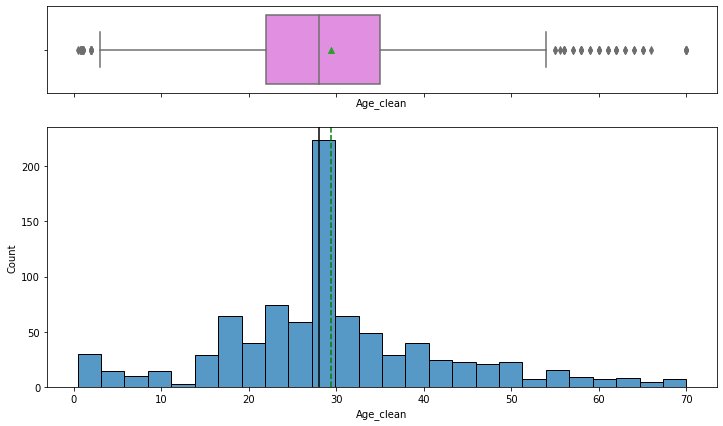

In [94]:
histogram_boxplot(titanic2, 'Age_clean')

In [95]:
titanic2.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.000000,0.000000,1.000000,1.0
Pclass,891.0,2.308642,0.836071,1.00,2.000000,3.000000,3.000000,3.0
SibSp,891.0,0.523008,1.102743,0.00,0.000000,0.000000,1.000000,8.0
Parch,891.0,0.381594,0.806057,0.00,0.000000,0.000000,0.000000,6.0
Cabin_ind,891.0,0.228956,0.420397,0.00,0.000000,0.000000,0.000000,1.0
Age_clean,891.0,29.343064,12.956561,0.42,22.000000,28.000000,35.000000,70.0
Fare_clean_tr,891.0,1.802389,0.434164,0.00,1.512306,1.706078,1.987341,3.0


- Clipping Using Interquantile Range

In [106]:
# functions to treat outliers by flooring and capping


def treat_outliers(titanic2, col):
    """
    Treats outliers in a variable

   titanic2: dataframe
    col: dataframe column
    """
    Q1 = titanic2[col].quantile(0.25)  # 25th quantile
    Q3 = titanic2[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    titanic2[col] = np.clip(titanic2[col], Lower_Whisker, Upper_Whisker)

    return titanic2


def treat_outliers_all(titanic2, col_list):
    """
    Treat outliers in a list of variables

    titanic2: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        titanic2 = treat_outliers(titanic2, c)

    return titanic2

In [107]:
numerical_col = titanic2.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(titanic2, numerical_col)

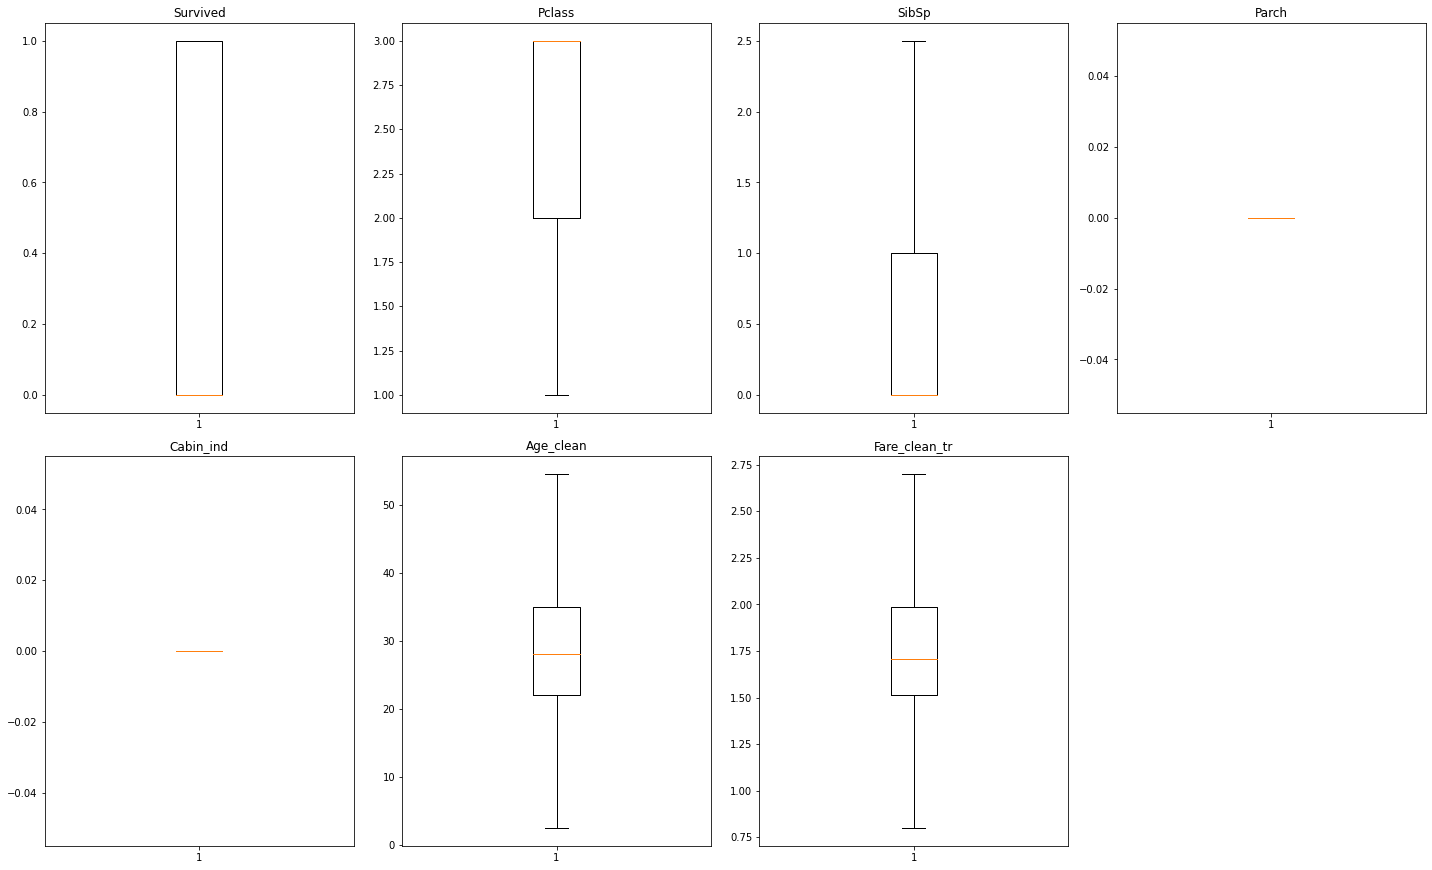

In [108]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(titanic2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Bining

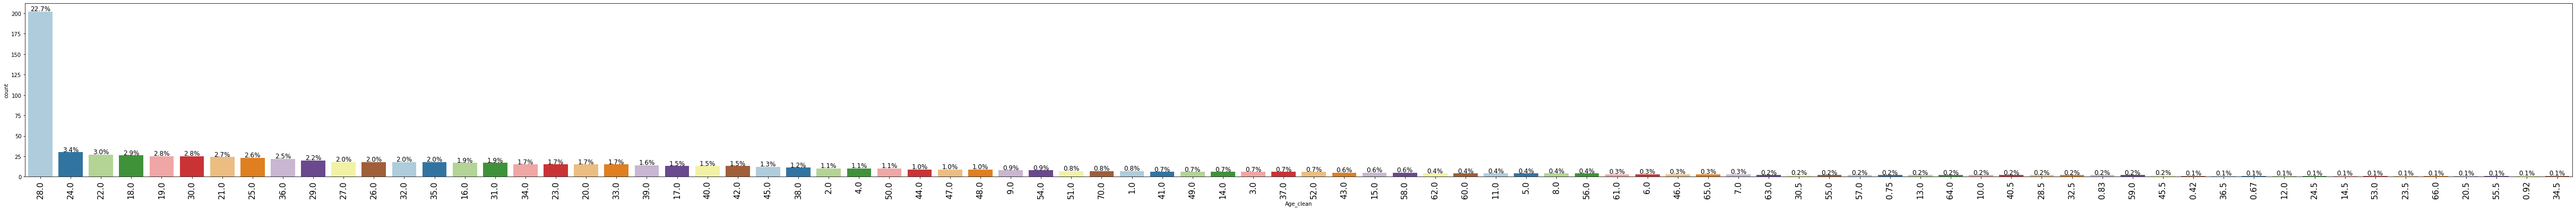

In [96]:
labeled_barplot(titanic2, "Age_clean", perc=True)

In [97]:
# can add custom labels
titanic2['age_bin'] = pd.cut(
    titanic2['Age_clean'], [-np.inf, 18,30,40,50, np.inf], 
    labels = ["Children", "Youths", "Adults", "Senior","Aged"]

)
titanic2['age_bin'].value_counts(dropna=False)

Youths      447
Adults      155
Children    139
Senior       86
Aged         64
Name: age_bin, dtype: int64

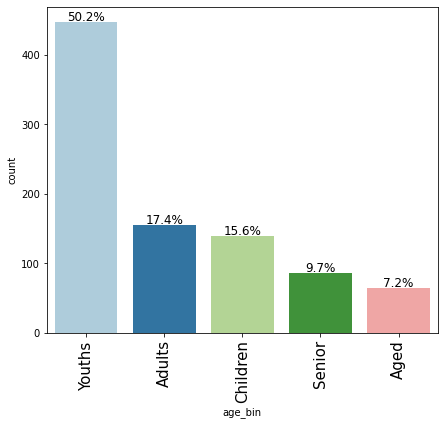

In [98]:
labeled_barplot(titanic2, "age_bin", perc=True)

In [99]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Survived    0    1  All
age_bin                
All       549  342  891
Youths    299  148  447
Children   69   70  139
Adults     86   69  155
Senior     53   33   86
Aged       42   22   64
------------------------------------------------------------------------------------------------------------------------


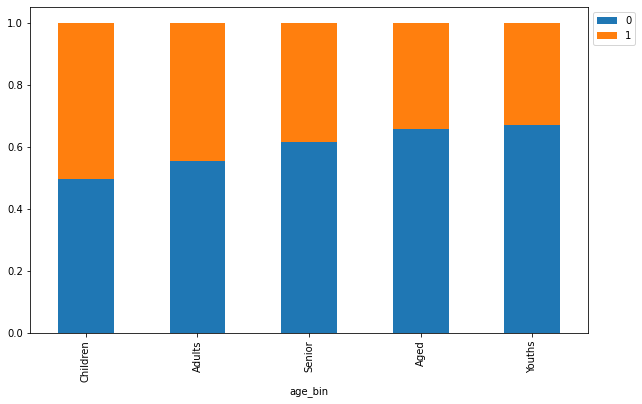

In [100]:
stacked_barplot(titanic2, "age_bin", "Survived")

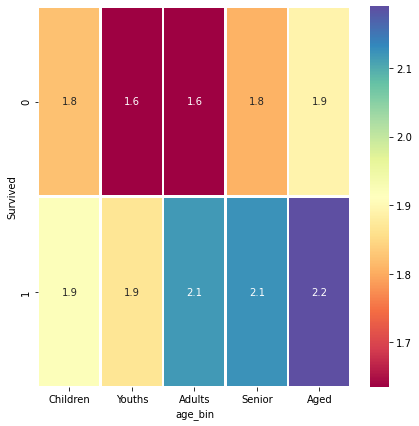

In [101]:
df_hm = titanic2.pivot_table(
    index="Survived",
    columns="age_bin",
    values="Fare_clean_tr",
    aggfunc=np.mean,
)

# Draw a heatmap
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df_hm, cmap="Spectral", linewidths=1.5, annot=True, ax=ax)
plt.show()

In [109]:
titanic2.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin_ind,Title1,Age_clean,Embarked_clean,Fare_clean_tr,age_bin
0,0,3,0,1.0,0.0,0.0,Mr,22.0,S,1.486167,Youths
1,1,1,1,1.0,0.0,0.0,Mrs,38.0,C,2.347457,Adults
2,1,3,1,0.0,0.0,0.0,Miss,26.0,S,1.512864,Youths
3,1,1,1,1.0,0.0,0.0,Mrs,35.0,S,2.213191,Adults
4,0,3,0,0.0,0.0,0.0,Mr,35.0,S,1.517606,Adults


In [110]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        891 non-null    int64   
 1   Pclass          891 non-null    int64   
 2   Sex             891 non-null    category
 3   SibSp           891 non-null    float64 
 4   Parch           891 non-null    float64 
 5   Cabin_ind       891 non-null    float64 
 6   Title1          891 non-null    object  
 7   Age_clean       891 non-null    float64 
 8   Embarked_clean  891 non-null    category
 9   Fare_clean_tr   891 non-null    float64 
 10  age_bin         891 non-null    category
dtypes: category(3), float64(5), int64(2), object(1)
memory usage: 58.9+ KB


In [111]:
titanic2.drop(["age_bin"], axis=1)

,Survived,Pclass,Sex,SibSp,Parch,Cabin_ind,Title1,Age_clean,Embarked_clean,Fare_clean_tr
0,0,3,0,1.0,0.0,0.0,Mr,22.0,S,1.486167
1,1,1,1,1.0,0.0,0.0,Mrs,38.0,C,2.347457
2,1,3,1,0.0,0.0,0.0,Miss,26.0,S,1.512864
3,1,1,1,1.0,0.0,0.0,Mrs,35.0,S,2.213191
4,0,3,0,0.0,0.0,0.0,Mr,35.0,S,1.517606
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0.0,0.0,0.0,Other,27.0,S,1.670278
887,1,1,1,0.0,0.0,0.0,Miss,19.0,S,1.974350
888,0,3,1,1.0,0.0,0.0,Miss,28.0,S,1.879440
889,1,1,0,0.0,0.0,0.0,Mr,26.0,C,1.974350


## Saving to csv

In [112]:
titanic2.to_csv('titanic2_cleaned.csv', index=False)

In [113]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/titanic2_cleaned.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  titanic2.to_csv(f)

Mounted at /content/drive
